In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plexible","key":"6cd35b747f27665b9d75973369b88fc3"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d zaurbegiev/my-dataset

 61% 5.00M/8.14M [00:00<00:00, 31.7MB/s]
100% 8.14M/8.14M [00:00<00:00, 43.8MB/s]


In [ ]:
!unzip "my-dataset.zip" -d "/content/"

Archive:  my-dataset.zip
  inflating: /content/credit_test.csv  
  inflating: /content/credit_train.csv  


In [ ]:
df1 = pd.read_csv('credit_train.csv')
df2 = pd.read_csv('credit_test.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
#df.to_csv('LoanApprovalPrediction.csv', index=False)

In [ ]:
from google.colab import files

#files.download('LoanApprovalPrediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           110000 non-null  float64
 4   Term                          110000 non-null  object 
 5   Credit Score                  88865 non-null   float64
 6   Annual Income                 88865 non-null   float64
 7   Years in current job          105351 non-null  object 
 8   Home Ownership                110000 non-null  object 
 9   Purpose                       110000 non-null  object 
 10  Monthly Debt                  110000 non-null  float64
 11  Years of Credit History       110000 non-null  float64
 12  Months since last delinquent  51553 non-null 

In [ ]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_id                       110000 non-null  object 
 1   customer_id                   110000 non-null  object 
 2   loan_status                   100000 non-null  object 
 3   current_loan_amount           110000 non-null  float64
 4   term                          110000 non-null  object 
 5   credit_score                  88865 non-null   float64
 6   annual_income                 88865 non-null   float64
 7   years_in_current_job          105351 non-null  object 
 8   home_ownership                110000 non-null  object 
 9   purpose                       110000 non-null  object 
 10  monthly_debt                  110000 non-null  float64
 11  years_of_credit_history       110000 non-null  float64
 12  months_since_last_delinquent  51553 non-null 

In [ ]:
df.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.000000,Short Term,709.000000,1167493.000000,8 years,Home Mortgage,Home Improvements,5214.740000,17.200000,NaN,6.000000,1.000000,228190.000000,416746.000000,1.000000,0.000000
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.000000,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,0.000000,0.000000
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.000000,Short Term,741.000000,2231892.000000,8 years,Own Home,Debt Consolidation,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,0.000000,0.000000
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.000000,Long Term,721.000000,806949.000000,3 years,Own Home,Debt Consolidation,8741.900000,12.000000,NaN,9.000000,0.000000,256329.000000,386958.000000,0.000000,0.000000
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.000000,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.700000,6.100000,NaN,15.000000,0.000000,253460.000000,427174.000000,0.000000,0.000000


In [ ]:
# Drop unnecessary columns
df.drop(columns=['loan_id'],inplace=True)
df.drop(columns=['customer_id'],inplace=True)
df.drop(columns=['months_since_last_delinquent'],inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99786 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_status                89785 non-null  object 
 1   current_loan_amount        99785 non-null  float64
 2   term                       99785 non-null  object 
 3   credit_score               78650 non-null  float64
 4   annual_income              78650 non-null  float64
 5   years_in_current_job       95556 non-null  object 
 6   home_ownership             99785 non-null  object 
 7   purpose                    99785 non-null  object 
 8   monthly_debt               99785 non-null  float64
 9   years_of_credit_history    99785 non-null  float64
 10  number_of_open_accounts    99785 non-null  float64
 11  number_of_credit_problems  99785 non-null  float64
 12  current_credit_balance     99785 non-null  float64
 13  maximum_open_credit        99783 non-null  floa

In [ ]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67490 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_status                67490 non-null  object 
 1   current_loan_amount        67490 non-null  float64
 2   term                       67490 non-null  object 
 3   credit_score               67490 non-null  float64
 4   annual_income              67490 non-null  float64
 5   years_in_current_job       67490 non-null  object 
 6   home_ownership             67490 non-null  object 
 7   purpose                    67490 non-null  object 
 8   monthly_debt               67490 non-null  float64
 9   years_of_credit_history    67490 non-null  float64
 10  number_of_open_accounts    67490 non-null  float64
 11  number_of_credit_problems  67490 non-null  float64
 12  current_credit_balance     67490 non-null  float64
 13  maximum_open_credit        67490 non-null  flo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67490 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_status                67490 non-null  object 
 1   current_loan_amount        67490 non-null  float64
 2   term                       67490 non-null  object 
 3   credit_score               67490 non-null  float64
 4   annual_income              67490 non-null  float64
 5   years_in_current_job       67490 non-null  object 
 6   home_ownership             67490 non-null  object 
 7   purpose                    67490 non-null  object 
 8   monthly_debt               67490 non-null  float64
 9   years_of_credit_history    67490 non-null  float64
 10  number_of_open_accounts    67490 non-null  float64
 11  number_of_credit_problems  67490 non-null  float64
 12  current_credit_balance     67490 non-null  float64
 13  maximum_open_credit        67490 non-null  flo

In [ ]:
df['years_in_current_job'] = df['years_in_current_job'].str.extract(r"(\d+)")
df['years_in_current_job'] = df['years_in_current_job'].astype('int64')
df.head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,Fully Paid,445412.000000,Short Term,709.000000,1167493.000000,8,Home Mortgage,Home Improvements,5214.740000,17.200000,6.000000,1.000000,228190.000000,416746.000000,1.000000,0.000000
2,Fully Paid,99999999.000000,Short Term,741.000000,2231892.000000,8,Own Home,Debt Consolidation,29200.530000,14.900000,18.000000,1.000000,297996.000000,750090.000000,0.000000,0.000000
3,Fully Paid,347666.000000,Long Term,721.000000,806949.000000,3,Own Home,Debt Consolidation,8741.900000,12.000000,9.000000,0.000000,256329.000000,386958.000000,0.000000,0.000000
5,Charged Off,206602.000000,Short Term,7290.000000,896857.000000,10,Home Mortgage,Debt Consolidation,16367.740000,17.300000,6.000000,0.000000,215308.000000,272448.000000,0.000000,0.000000
6,Fully Paid,217646.000000,Short Term,730.000000,1184194.000000,1,Home Mortgage,Debt Consolidation,10855.080000,19.600000,13.000000,1.000000,122170.000000,272052.000000,1.000000,0.000000


In [ ]:
df.loc[df['purpose'] == 'other', 'purpose'] = 'other'

In [ ]:
columns = ['Loan Status','Term', 'Home Ownership', 'Purpose', 'Tax Liens']
#for i in df:
#    print(df[i].value_counts())
#    print("-------------------------------------")

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['term'] = label_encoder.fit_transform(df['term'])
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])

In [ ]:
df.describe()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000,67490.000000
mean,0.759757,16605266.016106,0.724359,1125.568751,1396654.331575,5.977997,1.932657,3.784901,18663.671150,18.036509,11.196088,0.160557,296769.926256,754623.153297,0.111646,0.028360
std,0.427234,36858718.996183,0.446840,1561.597095,1118572.241098,3.500288,0.956080,2.248035,12262.646859,6.811087,5.026188,0.475826,379904.631059,7461027.774004,0.343210,0.259357
min,0.000000,15422.000000,0.000000,585.000000,76627.000000,1.000000,0.000000,0.000000,0.000000,3.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,195563.500000,0.000000,708.000000,861640.500000,3.000000,1.000000,3.000000,10415.610000,13.400000,8.000000,0.000000,114703.000000,278542.000000,0.000000,0.000000
50%,1.000000,329208.000000,1.000000,729.000000,1198700.500000,6.000000,2.000000,3.000000,16377.620000,16.900000,10.000000,0.000000,212724.000000,475651.000000,0.000000,0.000000
75%,1.000000,580657.000000,1.000000,742.000000,1674774.000000,10.000000,3.000000,3.000000,24170.992500,21.500000,14.000000,0.000000,370842.000000,793870.000000,0.000000,0.000000
max,1.000000,99999999.000000,1.000000,7510.000000,165557393.000000,10.000000,3.000000,15.000000,435843.280000,70.500000,76.000000,15.000000,32878968.000000,1539737892.000000,7.000000,15.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67490 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_status                67490 non-null  int64  
 1   current_loan_amount        67490 non-null  float64
 2   term                       67490 non-null  int64  
 3   credit_score               67490 non-null  float64
 4   annual_income              67490 non-null  float64
 5   years_in_current_job       67490 non-null  int64  
 6   home_ownership             67490 non-null  int64  
 7   purpose                    67490 non-null  int64  
 8   monthly_debt               67490 non-null  float64
 9   years_of_credit_history    67490 non-null  float64
 10  number_of_open_accounts    67490 non-null  float64
 11  number_of_credit_problems  67490 non-null  float64
 12  current_credit_balance     67490 non-null  float64
 13  maximum_open_credit        67490 non-null  flo

In [ ]:
correlation_matrix = df.corr()

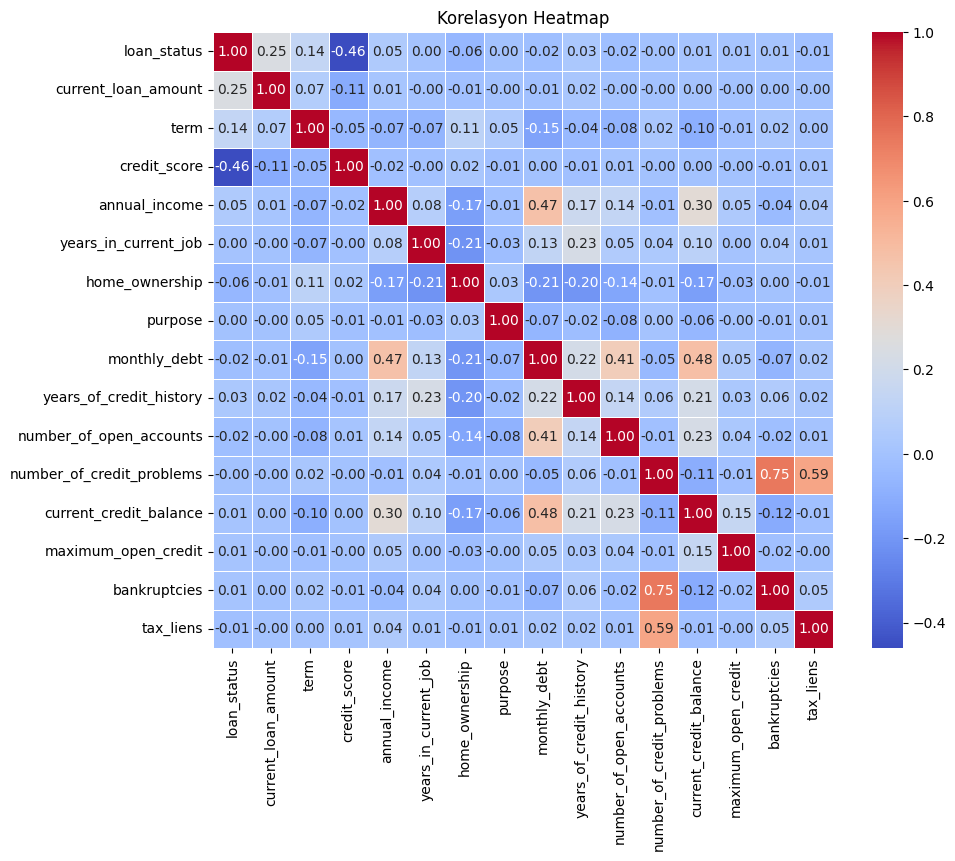

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasyon Heatmap')
plt.show()

In [ ]:
df.head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,1,445412.000000,1,709.000000,1167493.000000,8,1,5,5214.740000,17.200000,6.000000,1.000000,228190.000000,416746.000000,1.000000,0.000000
2,1,99999999.000000,1,741.000000,2231892.000000,8,2,3,29200.530000,14.900000,18.000000,1.000000,297996.000000,750090.000000,0.000000,0.000000
3,1,347666.000000,0,721.000000,806949.000000,3,2,3,8741.900000,12.000000,9.000000,0.000000,256329.000000,386958.000000,0.000000,0.000000
5,0,206602.000000,1,7290.000000,896857.000000,10,1,3,16367.740000,17.300000,6.000000,0.000000,215308.000000,272448.000000,0.000000,0.000000
6,1,217646.000000,1,730.000000,1184194.000000,1,1,3,10855.080000,19.600000,13.000000,1.000000,122170.000000,272052.000000,1.000000,0.000000


In [ ]:
columns_to_drop = ['tax_liens', 'bankruptcies', 'maximum_open_credit', 'current_credit_balance', 'number_of_credit_problems', 'purpose', 'years_in_current_job']

df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67490 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              67490 non-null  int64  
 1   current_loan_amount      67490 non-null  float64
 2   term                     67490 non-null  int64  
 3   credit_score             67490 non-null  float64
 4   annual_income            67490 non-null  float64
 5   home_ownership           67490 non-null  int64  
 6   monthly_debt             67490 non-null  float64
 7   years_of_credit_history  67490 non-null  float64
 8   number_of_open_accounts  67490 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 5.1 MB


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [ ]:
# Split the data to train and test
X = df.drop(columns=['loan_status'])
y = df['loan_status']
'''from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X, y = smote_enn.fit_resample(X, y)
'''
X

,current_loan_amount,term,credit_score,annual_income,home_ownership,monthly_debt,years_of_credit_history,number_of_open_accounts
0,445412.000000,1,709.000000,1167493.000000,1,5214.740000,17.200000,6.000000
2,99999999.000000,1,741.000000,2231892.000000,2,29200.530000,14.900000,18.000000
3,347666.000000,0,721.000000,806949.000000,2,8741.900000,12.000000,9.000000
5,206602.000000,1,7290.000000,896857.000000,1,16367.740000,17.300000,6.000000
6,217646.000000,1,730.000000,1184194.000000,1,10855.080000,19.600000,13.000000
...,...,...,...,...,...,...,...,...
99990,99999999.000000,1,742.000000,1190046.000000,3,11969.810000,20.100000,9.000000
99994,210584.000000,1,719.000000,783389.000000,1,3727.610000,17.400000,6.000000
99996,99999999.000000,1,732.000000,1289416.000000,3,13109.050000,9.400000,22.000000
99997,103136.000000,1,742.000000,1150545.000000,3,7315.570000,18.800000,12.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def prediction_results(classifiers, X_train_scaled, y_train, X_test_scaled):
  for classifier in classifiers:
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)

    print(f"\nResults for {classifier.__class__.__name__}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print("********************************************************")
    # Display the Confusion Matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Approval', 'Approval'], yticklabels=['No Approval', 'Approval'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("********************************************************")

def prediction_results_kfold(classifiers, cv, X_scaled):
  for classifier in classifiers:
    cv_scores = cross_val_score(classifier, X_scaled, y, cv=cv, scoring='accuracy')

    print(f"\nCross-Validation Results for {classifier.__class__.__name__}:")
    print(f"Average Accuracy: {cv_scores.mean()}")
    precision_cv = cross_val_score(classifier, X_scaled, y, cv=cv, scoring='precision')
    print(f"Average Precision: {precision_cv.mean()}")
    recall_cv = cross_val_score(classifier, X_scaled, y, cv=cv, scoring='recall')
    print(f"Average Recall: {recall_cv.mean()}")
    f1_cv = cross_val_score(classifier, X_scaled, y, cv=cv, scoring='f1')
    print(f"Average F1-Score: {f1_cv.mean()}")

    y_pred = cross_val_predict(classifier, X_scaled, y, cv=cv)

    cm = confusion_matrix(y, y_pred)
    print("Cross-Validation Confsion Matrix")
    # Display the Confusion Matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Approval', 'Approval'], yticklabels=['No Approval', 'Approval'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("********************************************************")


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)
XGB = XGBClassifier(scale_pos_weight=10)
knn_classifier = KNeighborsClassifier(n_neighbors=25)
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
naive_bayes = GaussianNB()

classifiers = [random_forest, knn_classifier, decision_tree, logistic_regression, gradient_boosting, naive_bayes, XGB]



Results for RandomForestClassifier:
Accuracy: 0.8204178396799526
Precision: 0.8164300750256382
Recall: 0.9847015168283315
F1-Score: 0.8927053824362607
********************************************************


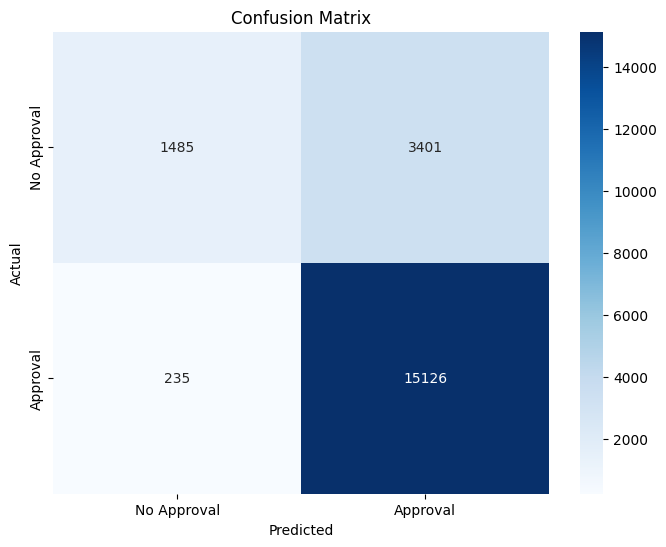

********************************************************

Results for KNeighborsClassifier:
Accuracy: 0.8202696695806786
Precision: 0.8129872903983766
Recall: 0.9910813098105592
F1-Score: 0.8932437586176548
********************************************************


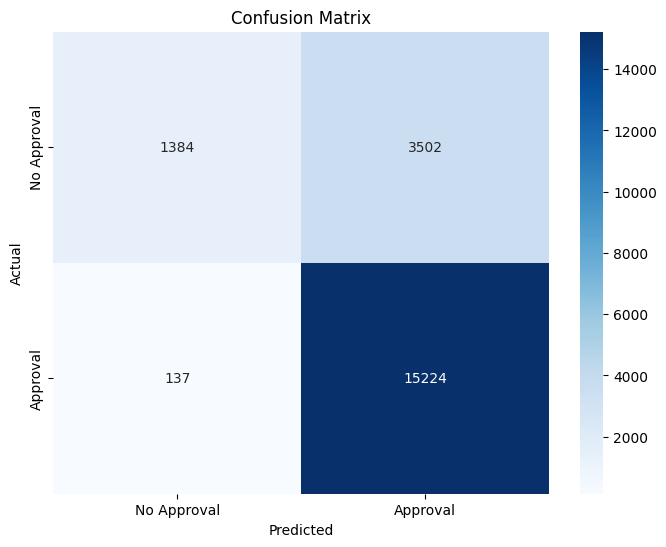

********************************************************

Results for DecisionTreeClassifier:
Accuracy: 0.7323060206450338
Precision: 0.8304194642026191
Recall: 0.813228305448864
F1-Score: 0.8217339823707407
********************************************************


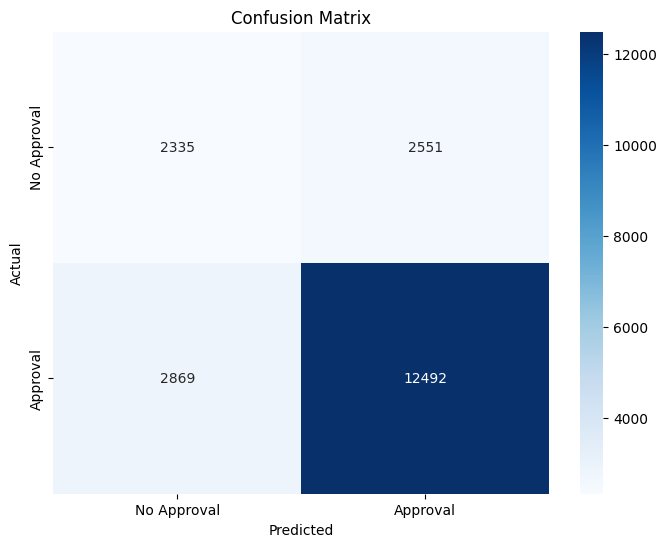

********************************************************

Results for LogisticRegression:
Accuracy: 0.8232824615992492
Precision: 0.8110776704155447
Recall: 1.0
F1-Score: 0.8956851311953353
********************************************************


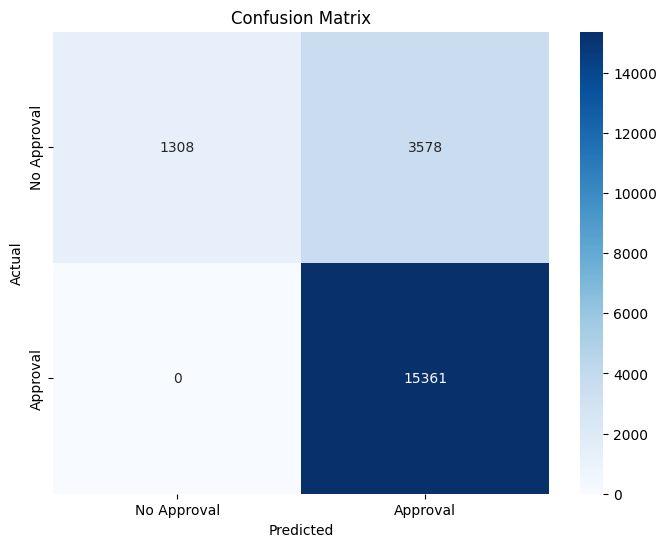

********************************************************

Results for GradientBoostingClassifier:
Accuracy: 0.8234306316985233
Precision: 0.8125596690357484
Recall: 0.9973309029360068
F1-Score: 0.8955136635978374
********************************************************


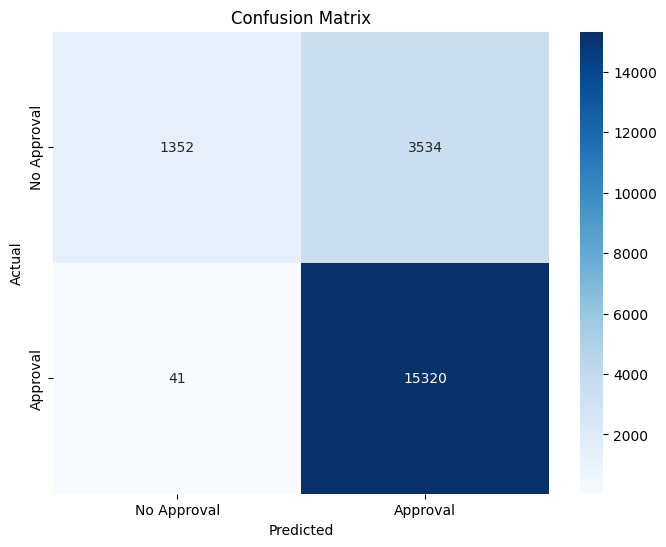

********************************************************

Results for GaussianNB:
Accuracy: 0.768508914900973
Precision: 0.8445003872966692
Recall: 0.8517023631274006
F1-Score: 0.8480860856318672
********************************************************


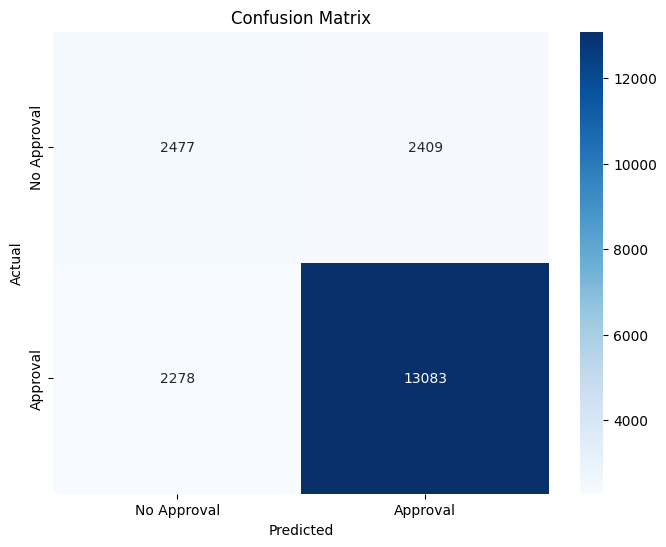

********************************************************

Results for XGBClassifier:
Accuracy: 0.823233071566158
Precision: 0.8113965535468866
Recall: 0.9992839007877091
F1-Score: 0.8955920534437993
********************************************************


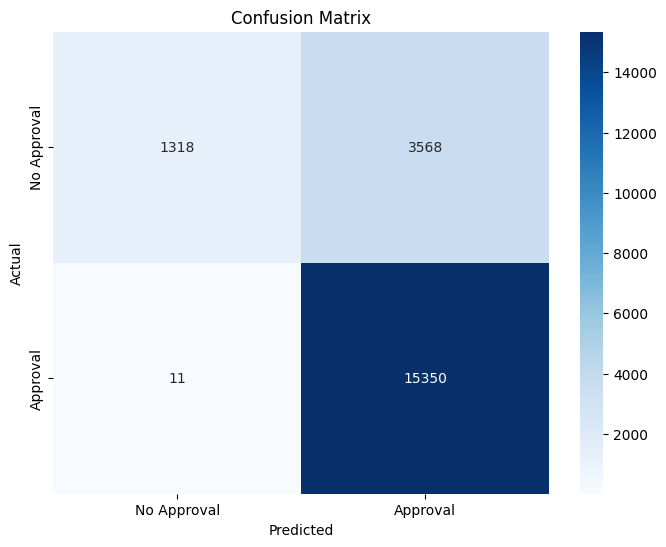

********************************************************


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
prediction_results(classifiers, X_train_scaled, y_train, X_test_scaled)


Cross-Validation Results for RandomForestClassifier:
Average Accuracy: 0.8201214994814047
Average Precision: 0.817091893561595
Average Recall: 0.9833841296893537
Average F1-Score: 0.8925563214042891
Cross-Validation Confsion Matrix


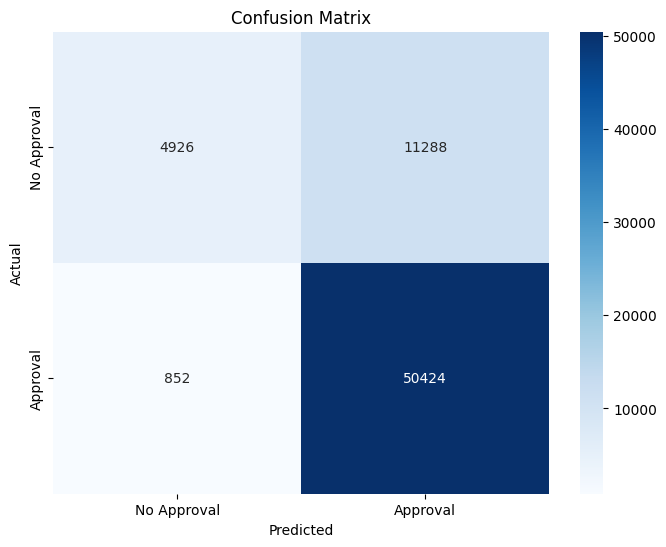

********************************************************

Cross-Validation Results for KNeighborsClassifier:
Average Accuracy: 0.820284486590606
Average Precision: 0.813668157028385
Average Recall: 0.9902293218703587
Average F1-Score: 0.8933059730915922
Cross-Validation Confsion Matrix


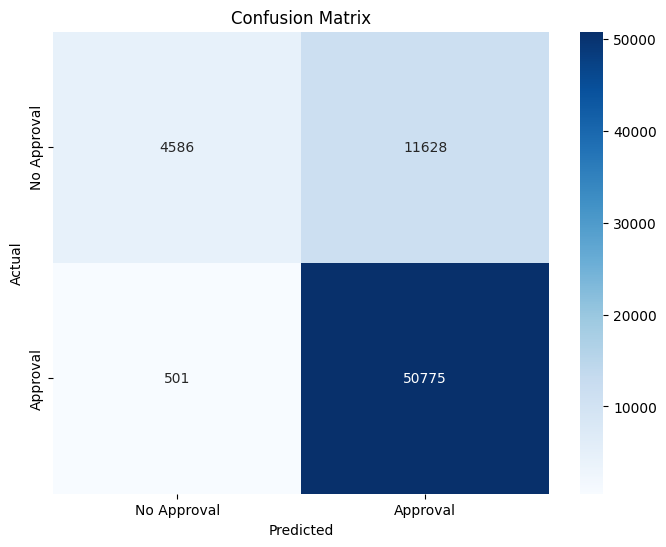

********************************************************

Cross-Validation Results for DecisionTreeClassifier:
Average Accuracy: 0.735486738776115
Average Precision: 0.8317618318861802
Average Recall: 0.8171268272615049
Average F1-Score: 0.8243711207555698
Cross-Validation Confsion Matrix


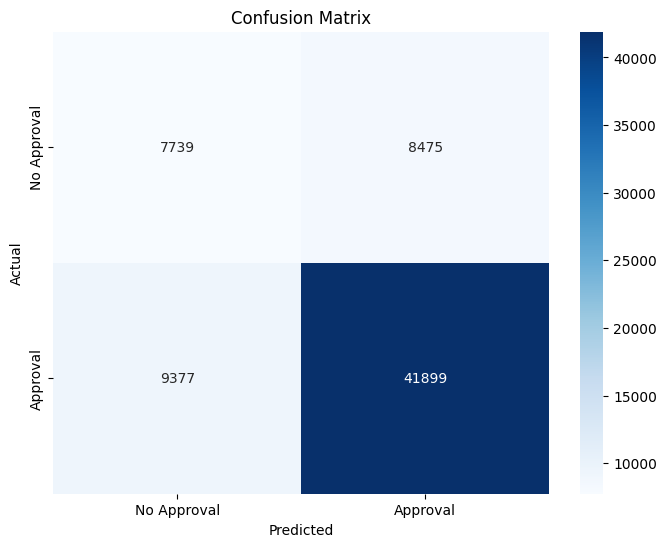

********************************************************

Cross-Validation Results for LogisticRegression:
Average Accuracy: 0.8233516076455771
Average Precision: 0.8113594265219606
Average Recall: 1.0
Average F1-Score: 0.8958556296345439
Cross-Validation Confsion Matrix


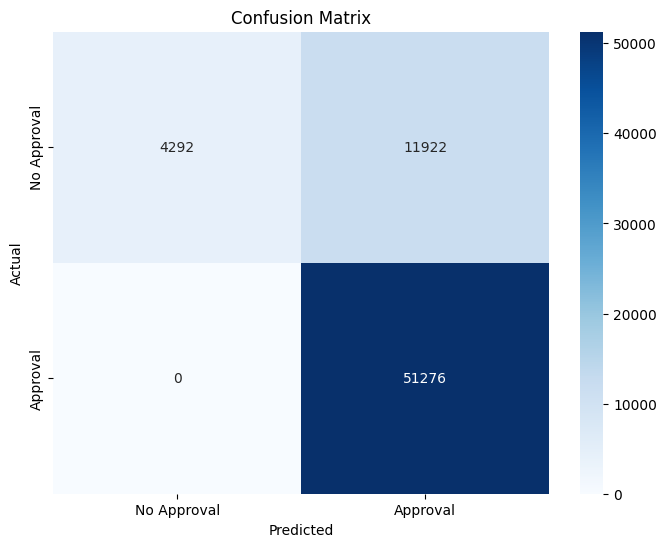

********************************************************

Cross-Validation Results for GradientBoostingClassifier:
Average Accuracy: 0.8235886798044154
Average Precision: 0.8126941165076482
Average Recall: 0.9977767399168757
Average F1-Score: 0.8957734753846547
Cross-Validation Confsion Matrix


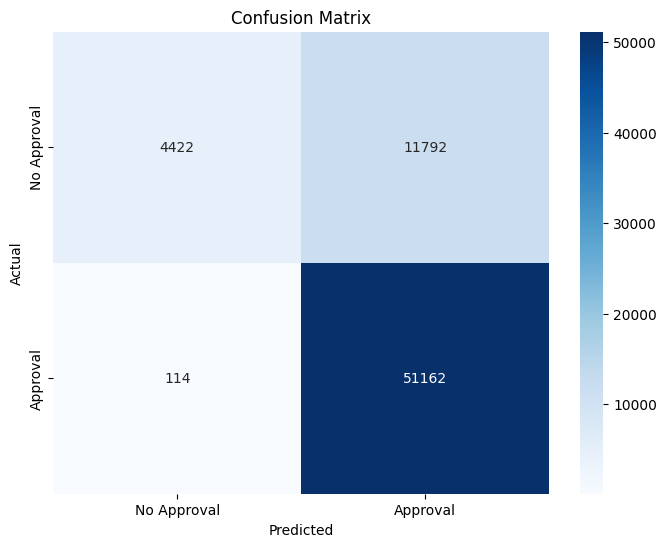

********************************************************

Cross-Validation Results for GaussianNB:
Average Accuracy: 0.7803674618461993
Average Precision: 0.833116556674045
Average Recall: 0.8890898365601096
Average F1-Score: 0.8601085045666593
Cross-Validation Confsion Matrix


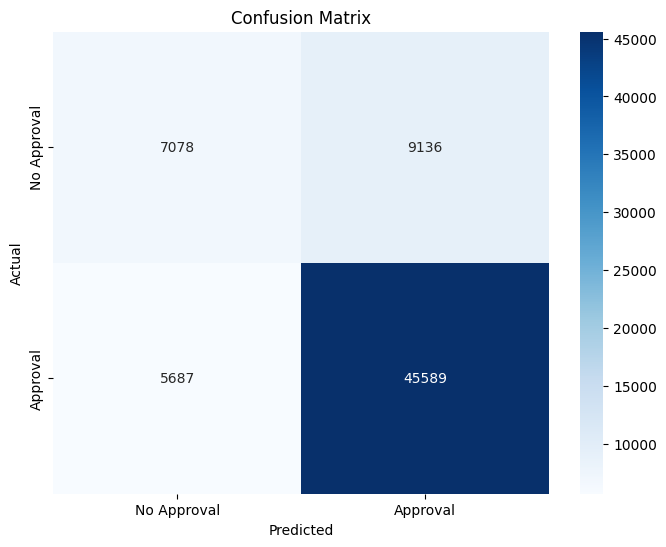

********************************************************

Cross-Validation Results for XGBClassifier:
Average Accuracy: 0.8232478885760853
Average Precision: 0.811703293008236
Average Recall: 0.999141912428984
Average F1-Score: 0.8957205312874631
Cross-Validation Confsion Matrix


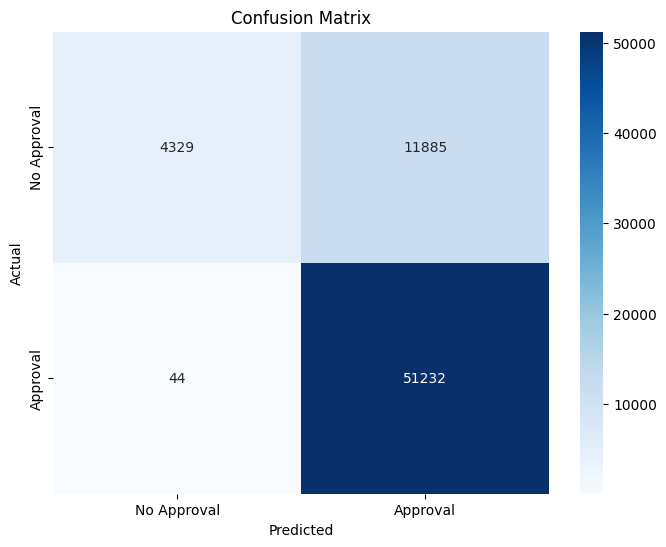

********************************************************


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
prediction_results_kfold(classifiers, cv, X_scaled)

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X, y = smote_enn.fit_resample(X, y)
X

,current_loan_amount,term,credit_score,annual_income,home_ownership,monthly_debt,years_of_credit_history,number_of_open_accounts
0,206602.000000,1,7290.000000,896857.000000,1,16367.740000,17.300000,6.000000
1,317108.000000,0,687.000000,1133274.000000,3,9632.810000,17.400000,4.000000
2,288948.000000,1,7120.000000,537472.000000,3,5777.900000,14.800000,4.000000
3,456808.000000,0,598.000000,1096167.000000,2,14341.390000,14.100000,8.000000
4,219692.000000,0,6610.000000,527839.000000,3,14207.630000,17.000000,9.000000
...,...,...,...,...,...,...,...,...
56960,99999999.000000,1,742.000000,1190046.000000,3,11969.810000,20.100000,9.000000
56961,210584.000000,1,719.000000,783389.000000,1,3727.610000,17.400000,6.000000
56962,99999999.000000,1,732.000000,1289416.000000,3,13109.050000,9.400000,22.000000
56963,103136.000000,1,742.000000,1150545.000000,3,7315.570000,18.800000,12.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Results for RandomForestClassifier:
Accuracy: 0.8822118197776477
Precision: 0.8903851333153784
Recall: 0.8464985277173217
F1-Score: 0.8678873794053947
********************************************************


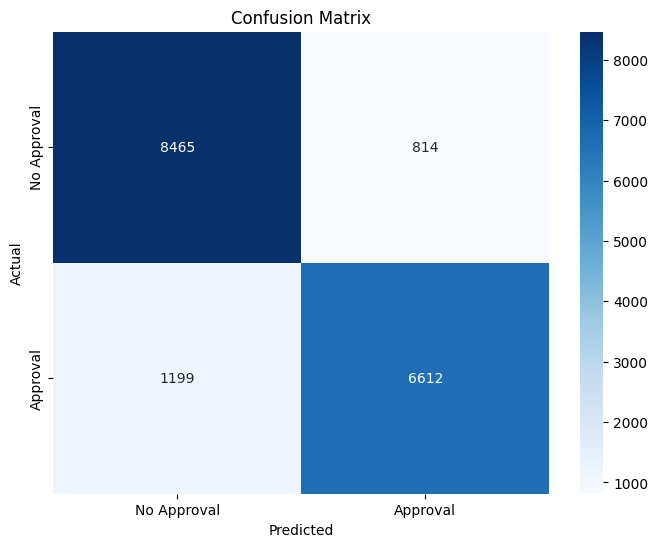

********************************************************

Results for KNeighborsClassifier:
Accuracy: 0.8164423639555296
Precision: 0.8253968253968254
Recall: 0.758929714505185
F1-Score: 0.7907690255452545
********************************************************


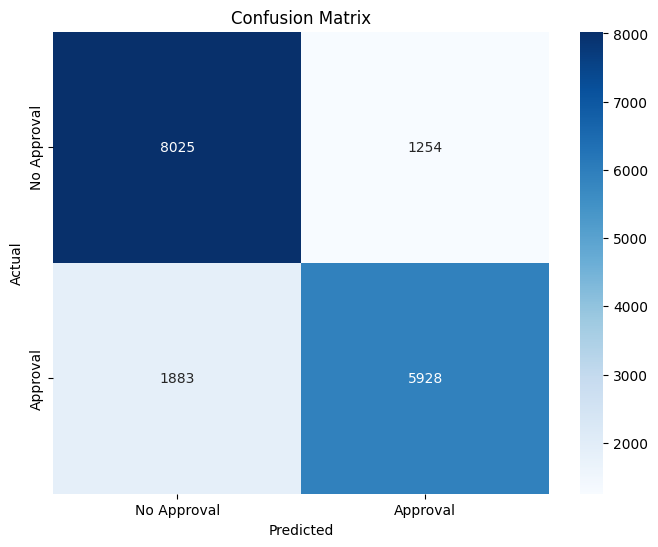

********************************************************

Results for DecisionTreeClassifier:
Accuracy: 0.839672322995904
Precision: 0.8353392408411586
Recall: 0.8086032518243502
F1-Score: 0.8217538381472808
********************************************************


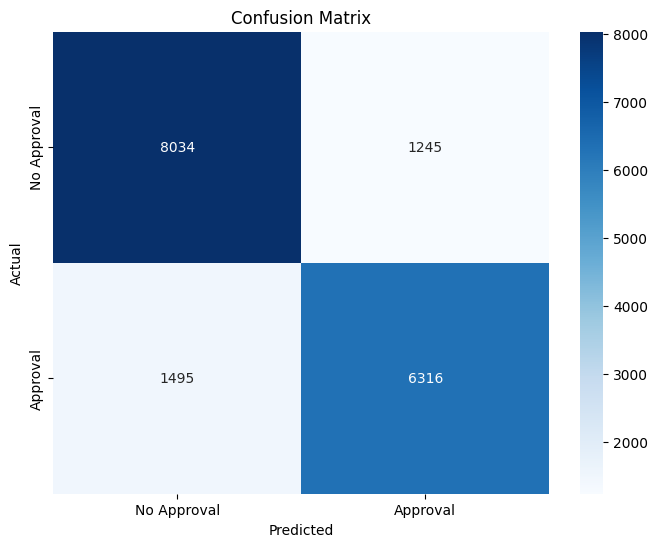

********************************************************

Results for LogisticRegression:
Accuracy: 0.8032182562902282
Precision: 0.7806663301362948
Recall: 0.7919600563308156
F1-Score: 0.7862726406101049
********************************************************


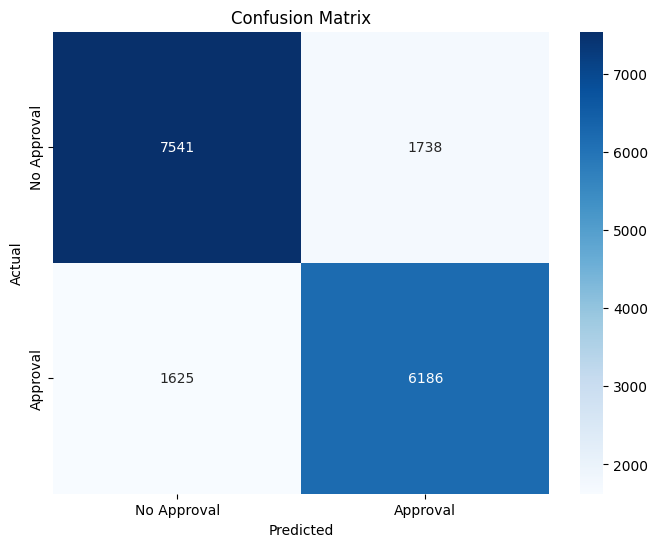

********************************************************

Results for GradientBoostingClassifier:
Accuracy: 0.8666471620830896
Precision: 0.866260593220339
Recall: 0.8375368070669569
F1-Score: 0.8516565774913754
********************************************************


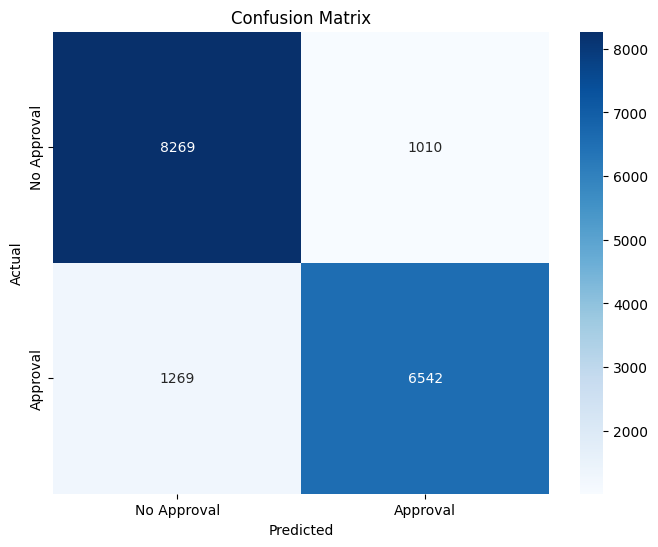

********************************************************

Results for GaussianNB:
Accuracy: 0.7634874195435928
Precision: 0.8353799608471258
Recall: 0.6009473818973243
F1-Score: 0.6990320178704394
********************************************************


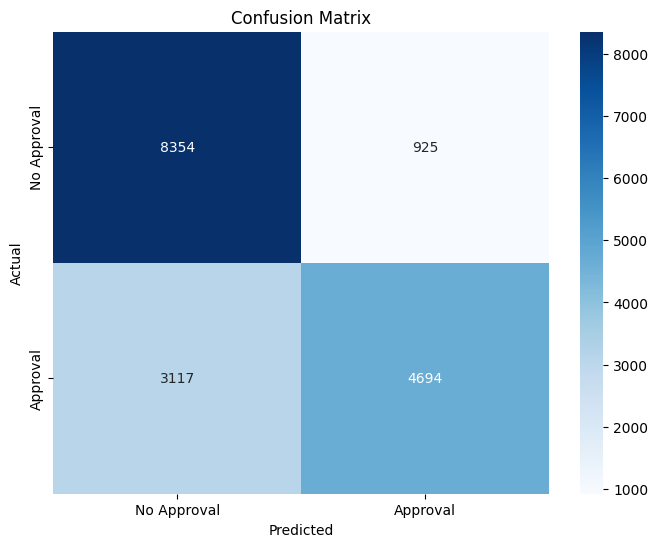

********************************************************

Results for XGBClassifier:
Accuracy: 0.8743124634289058
Precision: 0.7876663618815402
Recall: 0.9925745743182691
F1-Score: 0.878327857709301
********************************************************


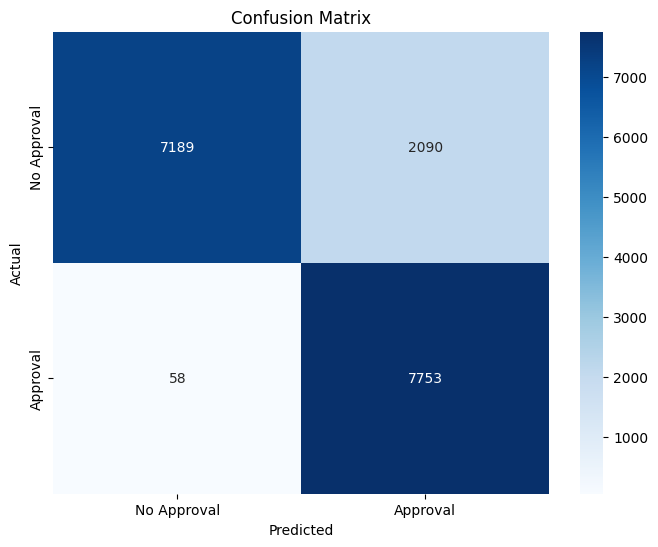

********************************************************


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
prediction_results(classifiers, X_train_scaled, y_train, X_test_scaled)


Cross-Validation Results for RandomForestClassifier:
Average Accuracy: 0.8917055910315502
Average Precision: 0.898113779334661
Average Recall: 0.8597207576993299
Average F1-Score: 0.8784790683201592
Cross-Validation Confsion Matrix


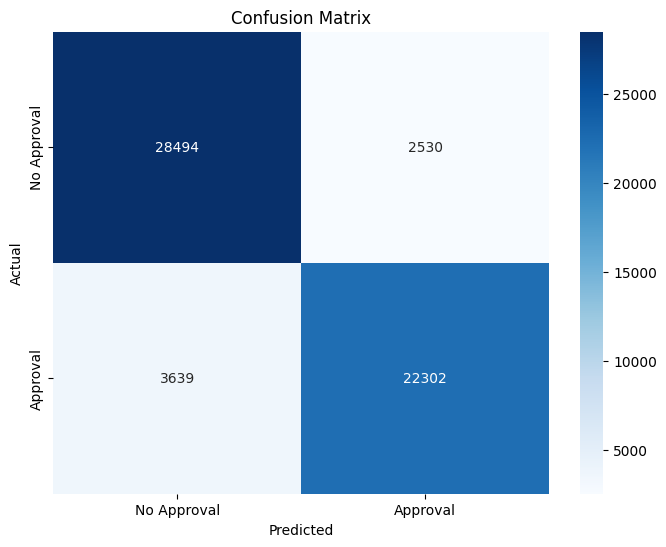

********************************************************

Cross-Validation Results for KNeighborsClassifier:
Average Accuracy: 0.8183799766238093
Average Precision: 0.8217541715916882
Average Recall: 0.7676659194257386
Average F1-Score: 0.793779762352887
Cross-Validation Confsion Matrix


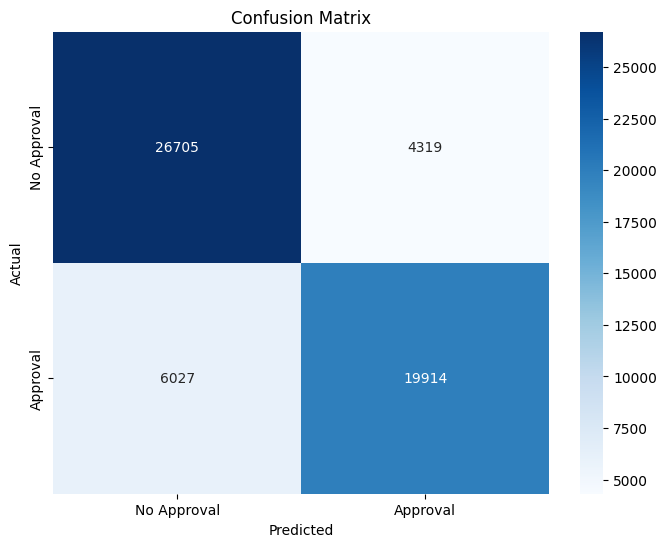

********************************************************

Cross-Validation Results for DecisionTreeClassifier:
Average Accuracy: 0.8485211607281972
Average Precision: 0.8424570674751923
Average Recall: 0.820863204400848
Average F1-Score: 0.8315117294274174
Cross-Validation Confsion Matrix


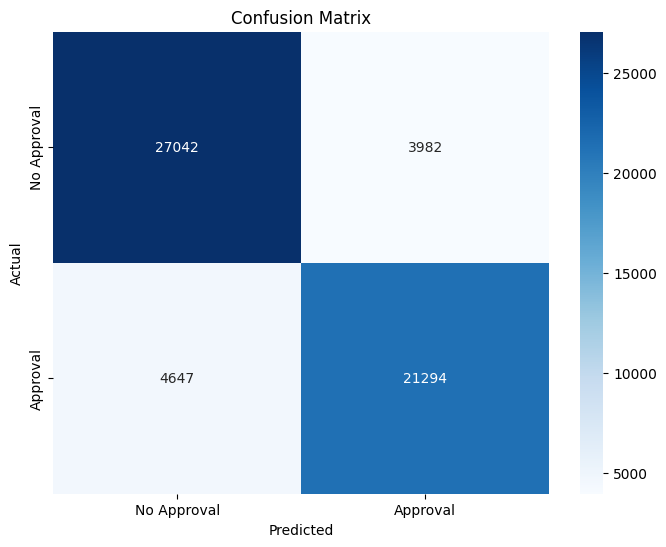

********************************************************

Cross-Validation Results for LogisticRegression:
Average Accuracy: 0.8045819194707248
Average Precision: 0.7760809031744724
Average Recall: 0.8026678432368755
Average F1-Score: 0.7891003635284016
Cross-Validation Confsion Matrix


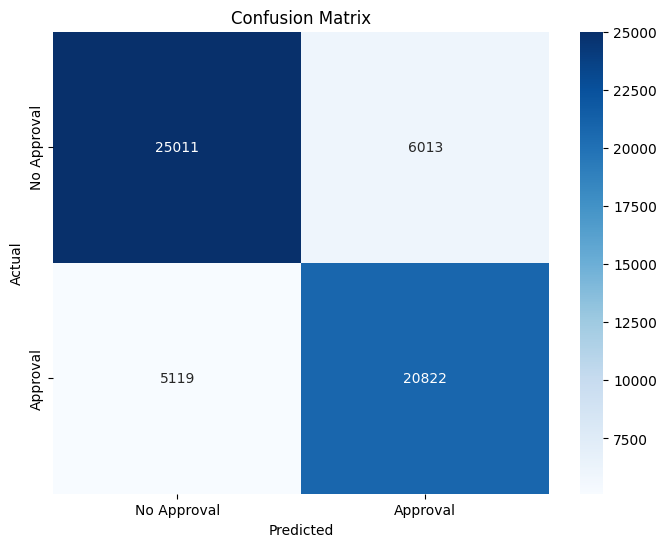

********************************************************

Cross-Validation Results for GradientBoostingClassifier:
Average Accuracy: 0.8685158559699271
Average Precision: 0.8633434183317478
Average Recall: 0.8450721317758634
Average F1-Score: 0.8540955101011682
Cross-Validation Confsion Matrix


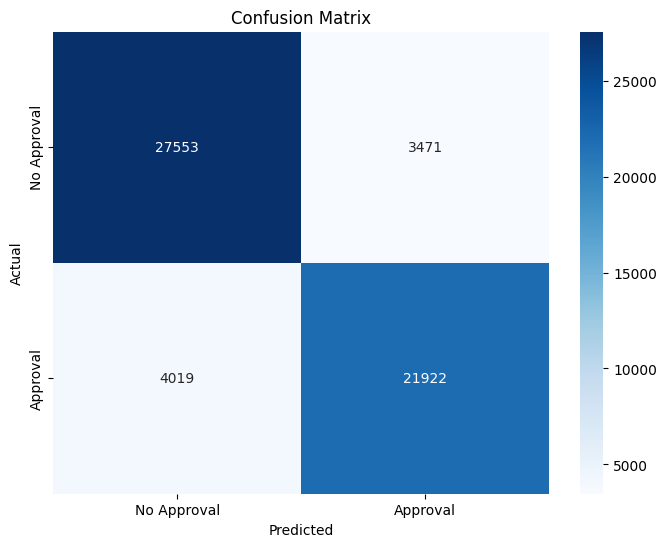

********************************************************

Cross-Validation Results for GaussianNB:
Average Accuracy: 0.7684894092199126
Average Precision: 0.8237145496806768
Average Recall: 0.6264596824151778
Average F1-Score: 0.7110137724026396
Cross-Validation Confsion Matrix


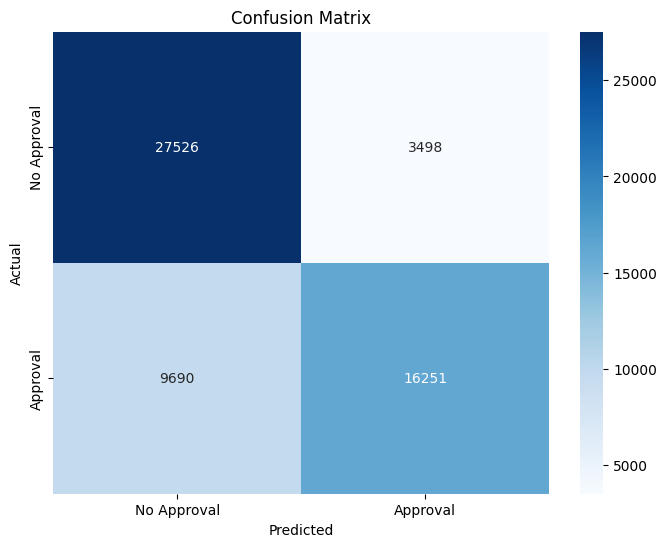

********************************************************

Cross-Validation Results for XGBClassifier:
Average Accuracy: 0.8755378101622577
Average Precision: 0.7876238679294846
Average Recall: 0.9950656992644952
Average F1-Score: 0.8792640619061309
Cross-Validation Confsion Matrix


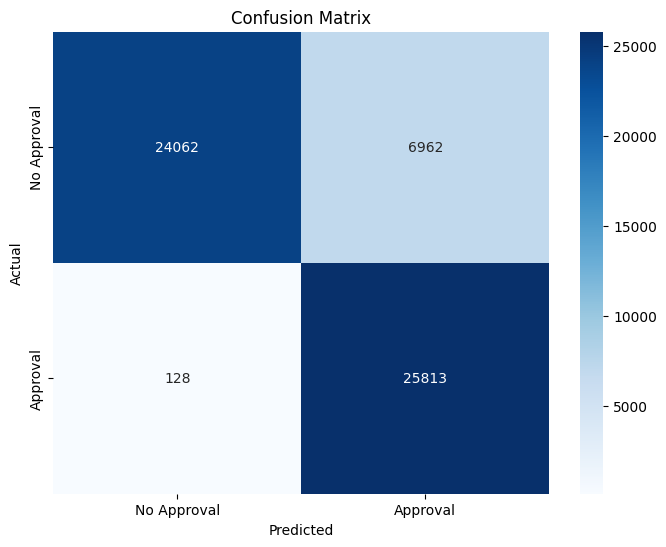

********************************************************


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
prediction_results_kfold(classifiers, cv, X_scaled)